In [1]:
%pylab inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PyTools import err, binner
from itertools import product
import os
import DataLoader as dl

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc("lines", linewidth=1.0)
rc("patch", linewidth=0.0)
rc("font", family="sans-serif", serif="Helvetica", size=15)
rc("text", usetex=False)
rc("savefig", dpi=92)
rc("legend", fontsize="x-small")
rc("xtick", labelsize="xx-small")
rc("ytick", labelsize="xx-small")

kw = "M log_t_M log_t_L log_Z_M Av".split()
lb = [r"$\Delta M_\star$", r"$\Delta\left<\log{t_\star}\right>_M$", r"$\Delta\left<\log{t_\star}\right>_L$",
      r"$\Delta\left<\log{Z_\star/Z\odot}\right>_M$", r"$\Delta\left<\log{Z_\star/Z\odot}\right>_L$",
      r"$\Delta A_V$"]

odir = "../outputs/photometric_fit/tta_cb_bc/"

In [3]:
s03_s03 = dl.load_data("z0p00", n_SFH=140, n_trials=50, n_bands=56)
m13_m03 = dl.load_data("m13_m03_t20", n_SFH=140, n_trials=20, n_bands=56)

In [4]:
residuals = zeros(140*20, dtype=s03_s03.residuals.dtype)
for i in xrange(140): residuals[i*20:(i+1)*20] = s03_s03.residuals[i*50:(i+1)*50][:20]

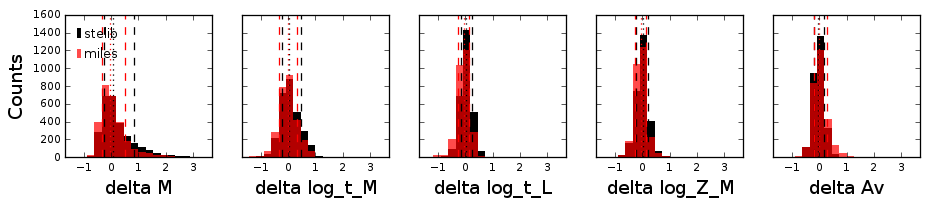

In [19]:
fig, axs = subplots(nrows=1, ncols=5, figsize=(12, 2), sharex=True, sharey=True)

rg = xlim(-1.7, +3.7)

for i in xrange(axs.size):
    medm = median(m13_m03.residuals[kw[i]])
    p16m = percentile(m13_m03.residuals[kw[i]], 16.0)
    p84m = percentile(m13_m03.residuals[kw[i]], 84.0)
    
    meds = median(residuals[kw[i]])
    p16s = percentile(residuals[kw[i]], 16.0)
    p84s = percentile(residuals[kw[i]], 84.0)
    
    axs[i].hist(residuals[kw[i]], 20, label="stelib", range=rg, color="k")
    axs[i].hist(m13_m03.residuals[kw[i]], 20, label="miles", range=rg, color="r", alpha=0.7)
    
    axs[i].axvline(p16s, ls="--", color="k")
    axs[i].axvline(p84s, ls="--", color="k")
    axs[i].axvline(meds, ls=":", color="k")
    
    axs[i].axvline(p16m, ls="--", color="r")
    axs[i].axvline(p84m, ls="--", color="r")
    axs[i].axvline(medm, ls=":", color="r")
    
    axs[i].set_xlabel("delta "+kw[i])
    #axs[i].set_xticks([-1, 0, +1])

axs[0].legend(loc=2, handlelength=0.3, handletextpad=0.3)
axs[0].set_ylabel("Counts")

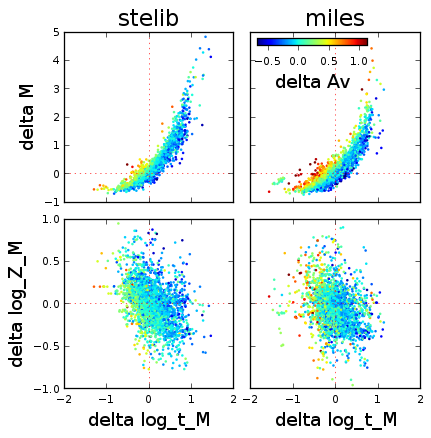

In [15]:
fig, axs = subplots(2, 2, figsize=(5, 5), sharex=True)
ins = inset_axes(axs[0, 1], width="65%", height="4%", loc=2)
ins.tick_params(bottom=True, top=False, direction="out")

axs[0, 0].set_xlim(-2.0, +2.0)
axs[0, 0].set_xticks(arange(-2.0, +2.5, 1.0))

tl = ["stelib", "miles"]
for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])) :
    ressx = residuals[kw[1]]
    resmx = m13_m03.residuals[kw[1]]
    
    if i == 0 :
        axs[i, j].set_title(tl[j])
        axs[i, j].set_ylim(-1.0, +5.0)
        axs[i, j].set_yticks(arange(-1.0, +5.5, 1.0))
        if j == 0 : axs[i, j].set_ylabel("delta "+kw[0])
        
        ressy = residuals[kw[0]]
        resmy = m13_m03.residuals[kw[0]]
    else :
        axs[i, j].set_ylim(-1.0, +1.0)
        if j == 0 : axs[i, j].set_ylabel("delta "+kw[-2])
        axs[i, j].set_xlabel("delta "+kw[1])
        
        ressy = residuals[kw[-2]]
        resmy = m13_m03.residuals[kw[-2]]

    ressz = residuals[kw[-1]]
    resmz = m13_m03.residuals[kw[-1]]
    
    if   j >  0 : axs[i, j].set_yticklabels([])
    if   j == 0 :
        sc = axs[i, j].scatter(ressx, ressy, s=4, edgecolor="none", c=ressz, vmin=ressz.min(), vmax=ressz.max())
    elif j == 1 :
        sc = axs[i, j].scatter(resmx, resmy, s=4, edgecolor="none", c=resmz, vmin=ressz.min(), vmax=ressz.max())

    axs[i, j].axvline(ls=":", color="r", lw=0.5)
    axs[i, j].axhline(ls=":", color="r", lw=0.5)
    
cb = colorbar(sc, cax=ins, orientation="horizontal")
cb.set_ticks(linspace(-1, +1, 5))
cb.set_label("delta "+kw[-1])

subplots_adjust(wspace=0.1, hspace=0.1)